# Framingham Heart Study #

- Contributors: Chaitanya Pasupala, Lucie Schulz
- Submission Date: Dec. 20th 2022

**Abstract:** The aim of this analysis is to fit a binary logistic regression machine learning model that accurately predicts whether or not a patients will develop a coronary heart disease in the next 10 years, followed by understanding the influence of significant factors that truly affects them. Next, testing the trained model’s generalization (model evaluation) strength on the unseen data set.

### Scope of study
1. Exploratory Analysis
2. Data Cleaning to prepare data set for analysis
3. Plots of various independent variables to understand the dataset and data patterns.
4. Implement Logistic Regression, Logit Model to explain the marginal effects of various variables on the probability of occurence of Coronary Heart Disease after 10 years.
5. Prediction: Confusion matrix with lowest false positives and false negatives.

### Info about Dataset ###
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information and includes 4,238 records,16 columns and 15 attributes.

**Demographic:**
- Sex: male or female (Nominal), Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Education: 0: Less than High School and High School degrees, 1: College Degree and Higher, Current Smoker: whether or not the patient is a current smoker (Nominal), Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (binary variables)**
- BP Meds: whether or not the patient was on blood pressure medication, Prevalent Stroke: whether or not the patient had previously had a stroke, Prevalent Hyp: whether or not the patient was hypertensive, Diabetes: whether or not the patient had diabetes

**Medical (continuous variables)**
- Tot Chol: total cholesterol level, Sys BP: systolic blood pressure, Dia BP: diastolic blood pressure, BMI: Body Mass Index, Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.), Glucose: glucose level

**Predict variable (desired target variable)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

### Data and Library Import

In [69]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm

In [70]:
# read in the data
framingham_data = pd.read_csv('framingham.csv')

## 1. Exploratory Data Analysis ##

In [71]:
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [72]:
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [73]:
len(framingham_data)

4238

In [74]:
# information about the dataset
vital_stats = framingham_data.describe().T
vital_stats['NaN'] = framingham_data.isna().sum()
vital_stats

,count,mean,std,min,25%,50%,75%,max,NaN
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0,0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0,0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0,105
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0,0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0,29
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0,53
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0,0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0,0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0,0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0,50


## 2. Data Preparation & Cleaning ##

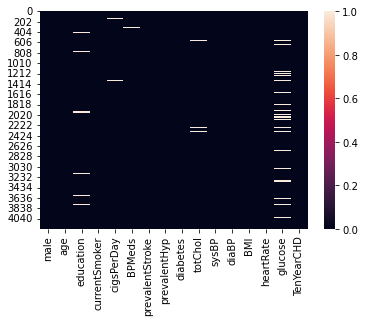

In [75]:
# visualize null values
sns.heatmap(framingham_data.isna())
plt.show()

In [76]:
# Use other covariates to regress and replace missing NaN values
# How we go about - 
# 1. Regress columns that have missing values over those that do not have missing values.
# 2. If the non-NaN columns have good predictions (check r-squared for goodness of fit), we replace
# NaN values using the predicted values.
# 3. If the prediction is not good, figure out some other way like replace with mean or mode
# 4. Also, we make sure that we dont make use of the 'outcome' column as covariate in regression.

# Create a copy of the original dataframe to work on regression

new_fd = pd.DataFrame(framingham_data.drop(columns=['TenYearCHD']))

# Remove all rows with NaN values. This will be the non-NaN training data subset
training_data = new_fd[~new_fd.isnull().any(axis=1)]

# Find the columns that have NaN values
na_columns = new_fd.columns[new_fd.isna().any()]

# Create a dictionary to store the results of regression predictions
predicted_values = {}

# Loop over each of the columns that contains NaN values
for column in na_columns:
    
    Y = training_data[column].to_numpy()
    
    X = training_data.drop(columns=na_columns).to_numpy()
    
    model = sm.OLS(Y,X,missing='raise').fit()
    
    print(column,'\t\t', model.rsquared)
    
    Y = model.predict(new_fd.drop(columns=na_columns).to_numpy())
    
    # Save the predicted values in the dictionary.
    predicted_values.update({column:Y.copy()})
    
# Based on the R-squared, we check the goodness of fit and take a decision on the substitution of NaNs

education 		 0.7791630010172367
cigsPerDay 		 0.7655084829161867
BPMeds 		 0.11844187421567098
totChol 		 0.966716474093699
BMI 		 0.9763742633613963
heartRate 		 0.971007124730545
glucose 		 0.9457709985869588


In [77]:
# As can be seen from above, for BPMeds is not fitting well with the regression model. 
# Also, BPMeds is a categorical variable. So, we better choose mode to replace NaNs.
bpmed_mode = framingham_data['BPMeds'].mode().values[0]
framingham_data['BPMeds'].fillna(bpmed_mode,inplace=True)
predicted_values.pop('BPMeds')

for key in predicted_values.keys():
    framingham_data[key].where(~framingham_data[key].isna(),predicted_values[key],inplace=True)

In [78]:
vital_stats = framingham_data.describe().T
vital_stats['NaN'] = framingham_data.isna().sum()
vital_stats

,count,mean,std,min,25%,50%,75%,max,NaN
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0,0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0,0
education,4238.0,1.979291,1.007720,1.00,1.00,2.0,3.000,4.0,0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0,0
cigsPerDay,4238.0,9.065447,11.904332,0.00,0.00,0.0,20.000,70.0,0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.000,1.0,0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0,0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0,0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0,0
totChol,4238.0,236.805644,44.435167,107.00,206.00,234.0,263.000,696.0,0


In [79]:
framingham_data.insert(loc=0, column='intercept', value=1)
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 3. Data Visualizations ##

This section will give a visual overview of the patient information available in the data set to get a better understanding of the underlying data for the analysis

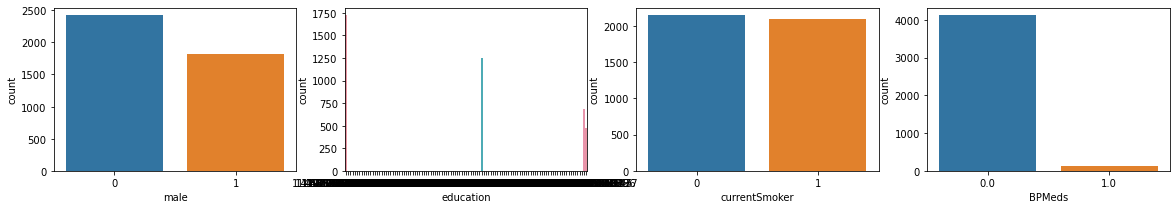

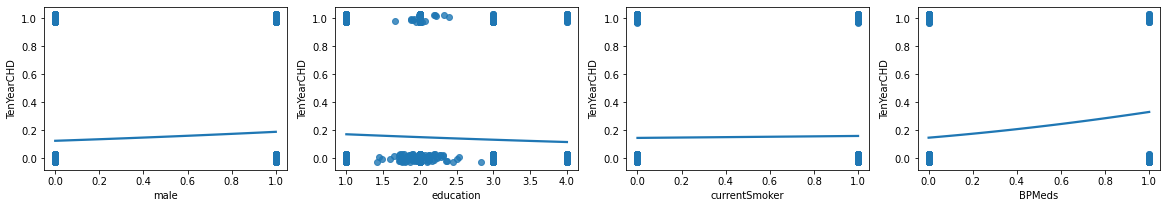

In [81]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.countplot(x = 'male', data=framingham_data, ax=ax1)
sns.countplot(x = 'education', data=framingham_data, ax=ax2)
sns.countplot(x = 'currentSmoker', data=framingham_data, ax=ax3)
sns.countplot(x = 'BPMeds', data=framingham_data, ax=ax4)
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.regplot(x = 'male', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'education', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'currentSmoker', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
sns.regplot(x = 'BPMeds', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax4)
plt.show()

**Observations:**

We can initially fit a logistic regression line using seaborn’s regplot( ) function to visualize how the probability of developing CHD changes based on the different attributes of a patient. This type of plot is only possible when fitting a logistic regression using a single independent variable. The current plots give you an intuition of how the logistic model fits an ‘S’ curve line and how the probability changes from 0 to 1 with observed values. In the oncoming model fitting, we will train/fit a multiple logistic regression model, which includes multiple independent variables.

**Male:**
- The data set includes more females than males
- The logistic regression line shows that the risk of developing a heart disease is higher for males than females

**Education:**
- Shows the distribution of educational levels is decreasing, meaning less people in the survey have the highest level of education (seems similar to the distribution in the population)
- The logistic regression line shows that the risk of developing a heart disease decreases with a higher education level

**Current Smoker:**
- The data set is almost split 50/50 into smokers and non smokers
- The logistic regression line shows that the risk of developing a heart disease increases when being a smoker

**BP Meds:**
- The plot shows that only a small fraction of patients is currently prescribed Blood Pressure Medication
- The logistic regression line shows that the risk of developing a heart disease increases when taking meds against high blood pressure


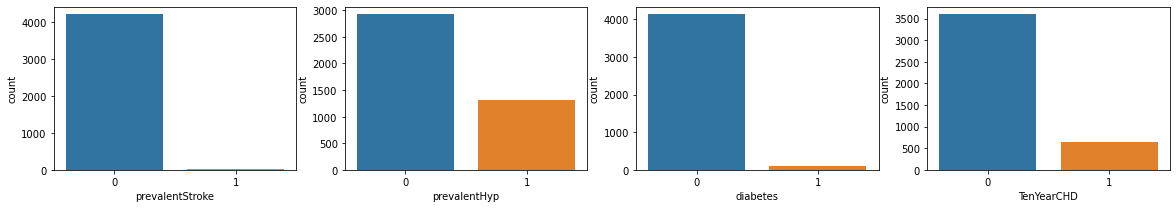

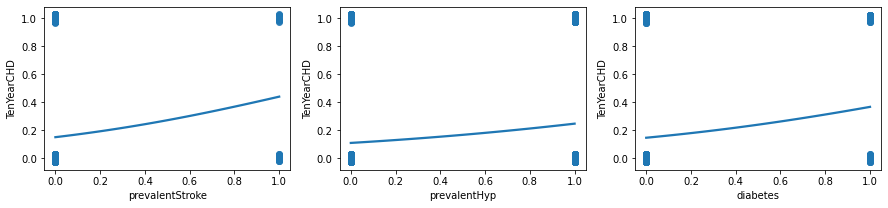

In [82]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.countplot(x = 'prevalentStroke', data=framingham_data, ax=ax1)
sns.countplot(x = 'prevalentHyp', data=framingham_data, ax=ax2)
sns.countplot(x = 'diabetes', data=framingham_data, ax=ax3)
sns.countplot(x = 'TenYearCHD', data=framingham_data, ax=ax4)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.regplot(x = 'prevalentStroke', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'prevalentHyp', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'diabetes', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
plt.show()

**Observations:**

**Prevalent Stroke:**
- Only a small subset of patients in the data had a stroke
- The logistic regression line shows that the risk of developing a heart disease increases when the patient had a stroke previously

**Prevalent Hypertension:**
- Around a third of the patients in the sample have diagnosed hypertension
- The logistic regression line shows that the risk of developing a heart disease increases with hypertension

**Diabetes:**
- Only a small percentage of patients in the data set have diabetes 
- The logistic regression line shows that the risk of developing a heart disease increases when having diabetes

**Ten Year CHD:**
- Shows that about 25% of patients develop a coronary heart disease withon 10 years

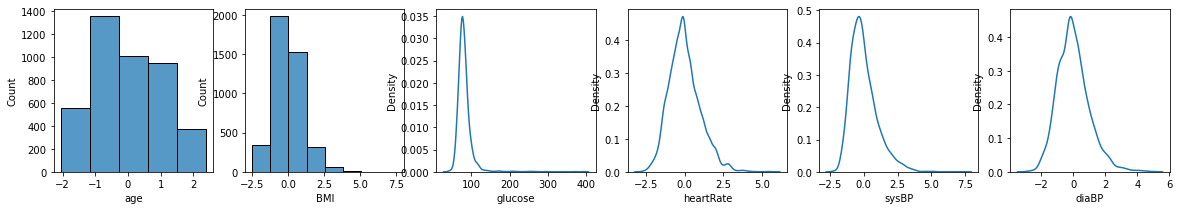

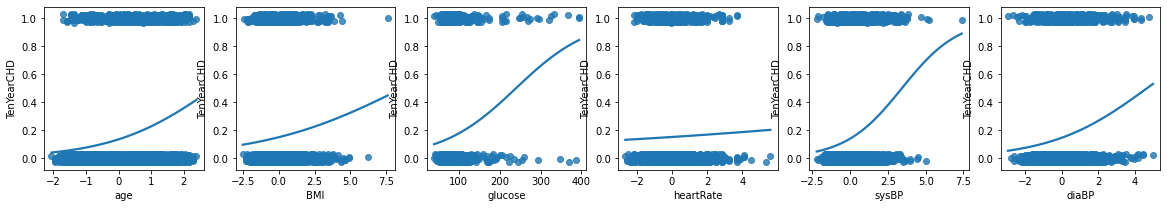

In [83]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20,3))
sns.histplot(x = 'age', data=framingham_data,bins=5, ax=ax1)
sns.histplot(x = 'BMI', data=framingham_data,bins=8, ax=ax2)
sns.kdeplot(framingham_data['glucose'], ax=ax3)
sns.kdeplot(framingham_data['heartRate'], ax=ax4)
sns.kdeplot(framingham_data['sysBP'], ax=ax5)
sns.kdeplot(framingham_data['diaBP'], ax=ax6)
plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20,3))
sns.regplot(x = 'age', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'BMI', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'glucose', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
sns.regplot(x = 'heartRate', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax4)
sns.regplot(x = 'sysBP', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax5)
sns.regplot(x = 'diaBP', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax6)
plt.show()

**Age:**
- Shows that the age in the sample ranges from 32 - 70 with the majority of patients being between 40 - 60 years old.
- The logistic regression line shows that the risk of developing a heart disease increases with age

**BMI:**
- The distribution of the BMI shows that the majority of patients have a normal weight (BMI between 18.5 - 25), but the sample also includes patients with a high BMI (+30) which is considered obese according to the CDC.
- The logistic regression line shows that the risk of developing a heart disease increases with a higher BMI

**Glucose:**
- The density plot shows that the majority of patients have a glucose level below 100
- The logistic regression line shows that the risk of developing a heart disease increases with a higher glucose level

**Heart Rate:**
- The plot shows that the heart rate is normal distributed with a few patients having a high heart rate (could be outliers)
- The logistic regression line shows that the risk of developing a heart disease increases with a higher heart rate

**Systolic blood pressure:**
- The logistic regression line shows that the risk of developing a heart disease increases with higher systolic blood pressure

**Diastolic blood pressure:**
- The logistic regression line shows that the risk of developing a heart disease increases with higher diastolic blood pressure



## 4. Data Modelling using Logistic Regression

Building Model using Logistic Regression

### Standardization of variables

We will convert the normal distribution of the underlying continuous variables into the standard normal distribution. In order to do this, we use the z-value. The Z-value (or sometimes referred to as Z-score or simply Z) represents the number of standard deviations an observation is from the mean for a set of data. To find the z-score for a particular observation we apply the following formula:

$$
z = \frac{(X - 	\mu) }{\sigma}
$$

where,
* $z = Z-Score$
* $X = The \: value \:of \:the \:element$
* $μ = The \:population \:mean$
* $σ = The \:population \:standard \:deviation $

In [174]:
# function that standardizes the values in a column
def standardize_numeric_features(df, column):
    return round((df[column] - df[column].mean()) / df[column].std(), 6)

framingham_data['age'] = standardize_numeric_features(framingham_data, 'age')
framingham_data['cigsPerDay'] = standardize_numeric_features(framingham_data, 'cigsPerDay')
framingham_data['totChol'] = standardize_numeric_features(framingham_data, 'totChol')
framingham_data['sysBP'] = standardize_numeric_features(framingham_data, 'sysBP')
framingham_data['diaBP'] = standardize_numeric_features(framingham_data, 'diaBP')
framingham_data['BMI'] = standardize_numeric_features(framingham_data, 'BMI')
framingham_data['heartRate'] = standardize_numeric_features(framingham_data, 'heartRate')
framingham_data['glucose'] = standardize_numeric_features(framingham_data, 'glucose')
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.234805,4.0,0,-0.761525,0.0,0,0,0,-0.940823,-1.195766,-1.082497,0.286887,0.342713,-0.204733,0
1,1,0,-0.418208,2.0,0,-0.761525,0.0,0,0,0,0.296935,-0.515126,-0.158970,0.718365,1.590096,-0.247955,0
2,1,1,-0.184895,1.0,1,0.918536,0.0,0,0,0,0.184412,-0.220183,-0.242927,-0.112721,-0.073081,-0.507283,0
3,1,0,1.331643,3.0,1,1.758566,0.0,0,1,0,-0.265682,0.800777,1.016429,0.681591,-0.904670,0.919023,1
4,1,0,-0.418208,3.0,1,1.170545,0.0,0,0,0,1.084599,-0.106743,0.092902,-0.661875,0.758507,0.141038,0


In [85]:
# change data frame to numpy arrat
np_fh = np.array(framingham_data)
np_fh

array([[ 1.00000000e+00,  1.00000000e+00, -1.23480500e+00, ...,
         3.42713000e-01,  7.70000000e+01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -4.18208000e-01, ...,
         1.59009600e+00,  7.60000000e+01,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00, -1.84895000e-01, ...,
        -7.30810000e-02,  7.00000000e+01,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  0.00000000e+00, -1.84895000e-01, ...,
         6.75349000e-01,  8.60000000e+01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -6.51521000e-01, ...,
         8.41666000e-01,  8.11300527e+01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  2.81732000e-01, ...,
         3.42713000e-01,  1.07000000e+02,  0.00000000e+00]])

In [89]:
# Building the Logistic Regression model :
ind_var = np_fh[:, :-1]
dep_var = np_fh[:, -1]
log_reg = sm.Logit(dep_var, ind_var).fit()
log_reg.summary(xname=["intercept","male", "age", "currentSmoker", "cigsPerDay", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"])

Optimization terminated successfully.
         Current function value: 0.378777
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           15
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.1110
Time:                        12:07:19   Log-Likelihood:                -1605.3
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 4.190e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.8364      0.227    -12.501      0.000      -3.281      -2.392
male                0.5074      0.100      5.053      0.000       0.311       0.704
age                 0.5309      0.053      9.957      0.000       0.426       0.635
currentSmoker      -0.0100      0.046     -0.216      0.829      -0.101       0.081
cigsPerDay          0.0174      0.145      0.120      0.905      -0.267       0.302
cigsPerDay          0.2465      0.068      3.601      0.000       0.112       0.381
BPMeds              0.2515      0.220      1.143      0.253      -0.180       0.683
prevalentStroke     0.9641      0.442      2.183      0.029       0.098       1.830
prevalentHyp        0.2417      0.129      1.880      0.060      -0.010       0.494
diabetes            0.1598      0.298      0.536      0.592      -0.424       0.744
totChol             0.0720      0.046      1.578      0.115      -0.017       0.161
sysBP               0.3074      0.078      3.934      0.000       0.154       0.461
diaBP              -0.0375      0.071     -0.527      0.598      -0.177       0.102
BMI                 0.0149      0.048      0.309      0.758      -0.080       0.109
heartRate          -0.0166      0.047     -0.357      0.721      -0.108       0.075
glucose             0.0069      0.002      3.183      0.001       0.003       0.011
===================================================================================
"""

**Explanation of some of the terms in the summary table:**

- coef : the coefficients of the independent variables in the regression equation.
- Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
- LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
- Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

**Remove multicollinearity via Variance Influence Factor**

One of the assumptions of linear and logistic regression is that the independent variables are independent of each other. Therefore, Multicollinearity is obviously violating the assumption of linear and logistic regression because it shows that the independent feature i.e the feature columns are dependent on each other. Eventhough your model will have a high accuracy without eliminating multicollinearity at times, but it can’t be relied on for real-world data. Also, the coefficients become very sensitive to small changes in the model. In simple terms, the model will not be able to generalize, which can cause tremendous failure if your model is in the production environment.

**What's the idea of VIF?**
It takes one column at a time as target and others as features and fits a Linear Regression model. After this, it calculates the r square value and for the VIF value, we take the inverse of 1-rsquare i.e 1/(1-rsquare). Hence after each iteration, we get VIF value for each column (which was taken as target above) in our dataset. Higher the VIF value, higher is the possibility of dropping the column while making the actual Regression model.

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [102]:
def get_VIF(dataFrame , target):
    X = framingham_data.iloc[:,:-1]
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = framingham_data['TenYearCHD']
print(get_VIF(framingham_data,target))

intercept          29.002894
male                1.197506
age                 1.376972
education           1.055444
currentSmoker       2.552161
cigsPerDay          2.684281
BPMeds              1.100863
prevalentStroke     1.019071
prevalentHyp        2.055563
diabetes            1.638642
totChol             1.112292
sysBP               3.751975
diaBP               2.966605
BMI                 1.240432
heartRate           1.094996
glucose             1.672119
dtype: float64


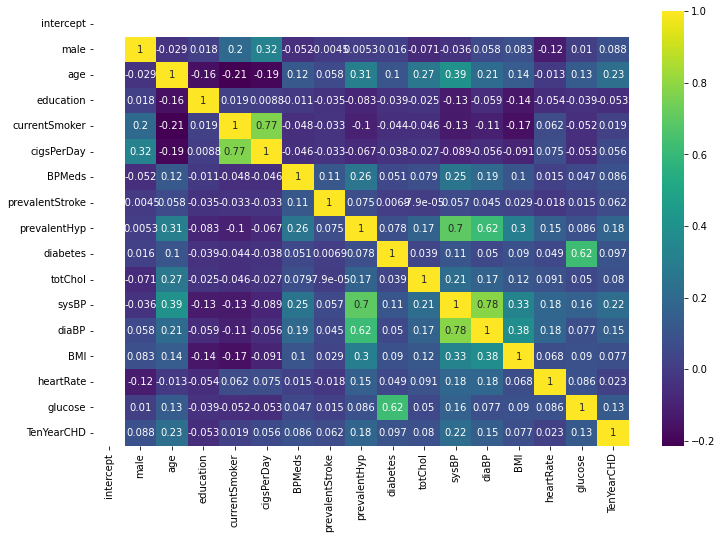

In [84]:
# Heatmap for correlation visualization
plt.figure(figsize=(12,8))
sns.heatmap(framingham_data.corr(),annot=True,cmap='viridis')
plt.show()

**Observations:**

Correlation plot shows insightful information about the relation within the attributes. It can Either be negative or positive or 0. We need to always keep 1 feature from 2 Strongly Correlated ones. This is important information since the Optimization Model we will be using in the analysis is assuming that the variables are independent from each other, so we will clean up the variables with a high correlation (keeping with one with higher predictive power)

currentSmoker & cigsPerDay has strong Correlation of 77 (Scaled for better Observations)
prevalentHyp vs sysBP / diaBP are having Positive Correlation of 70 and 62.
Glucose & diabetes are postively Correlated. (60)
sysBP & diaBP are also having Positive Correlation. (78)

**Removing factors**

Based on the results above and the correlation matrix, we will remove the following highly correlated attributes from the model: SysBP, DiaBP, currentSmoker and diabetes

In [109]:
# Update dataframe
new_df = framingham_data[["intercept","male","age","education", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "totChol", "BMI", "heartRate", "glucose", "TenYearCHD" ]]
new_df.head()

,intercept,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.234805,4.0,-0.761525,0.0,0,0,-0.940823,0.286887,0.342713,77.0,0
1,1,0,-0.418208,2.0,-0.761525,0.0,0,0,0.296935,0.718365,1.590096,76.0,0
2,1,1,-0.184895,1.0,0.918536,0.0,0,0,0.184412,-0.112721,-0.073081,70.0,0
3,1,0,1.331643,3.0,1.758566,0.0,0,1,-0.265682,0.681591,-0.904670,103.0,1
4,1,0,-0.418208,3.0,1.170545,0.0,0,0,1.084599,-0.661875,0.758507,85.0,0


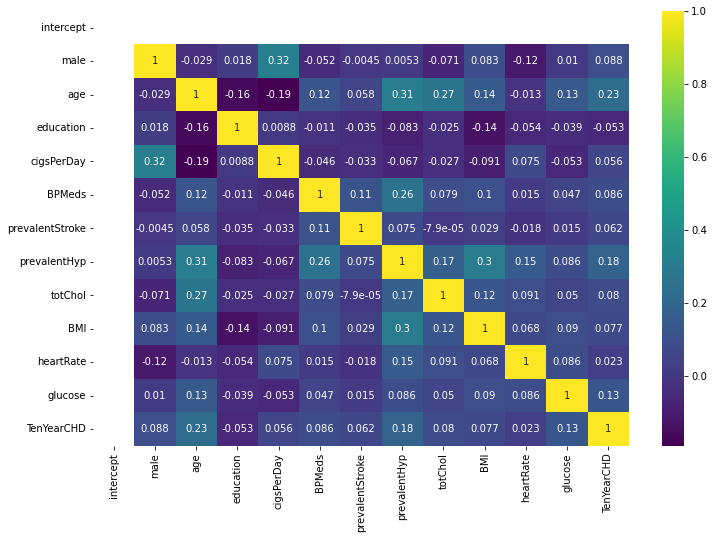

In [114]:
# Heatmap for correlation visualization once variables with high correlation are removed
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(),annot=True,cmap='viridis')
plt.show()

In [117]:
np_fh_2 = np.array(new_df)

In [119]:
# Building the Logistic Regression model:
ind_var = np_fh_2[:, :-1]
dep_var = np_fh_2[:, -1]
log_reg = sm.Logit(dep_var, ind_var).fit()
log_reg.summary(xname=["intercept","male","age","education", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "totChol", "BMI", "heartRate", "glucose"])

Optimization terminated successfully.
         Current function value: 0.381400
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4226
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.1049
Time:                        12:37:40   Log-Likelihood:                -1616.4
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.919e-74
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.9969      0.183    -16.350      0.000      -3.356      -2.638
male                0.4629      0.099      4.689      0.000       0.269       0.656
age                 0.5849      0.051     11.515      0.000       0.485       0.684
education          -0.0212      0.046     -0.462      0.644      -0.111       0.069
cigsPerDay          0.2551      0.046      5.489      0.000       0.164       0.346
BPMeds              0.3710      0.215      1.725      0.085      -0.051       0.792
prevalentStroke     0.9224      0.441      2.094      0.036       0.059       1.786
prevalentHyp        0.5881      0.101      5.838      0.000       0.391       0.786
totChol             0.0831      0.045      1.832      0.067      -0.006       0.172
BMI                 0.0415      0.046      0.896      0.370      -0.049       0.132
heartRate           0.0049      0.046      0.105      0.916      -0.086       0.095
glucose             0.0083      0.002      5.110      0.000       0.005       0.011
===================================================================================
"""

**Removing non significant features based on p-value**

As we can see from the above table many features are not statistically significant and keeping those in our model can reduce the model’s precision. Therefore we will remove those features from the model and re-run the it.

We will remove education, BPmeds, totChol, heartRate and BMI from the model.

In [154]:
# new df with attributes with high p-value removed
df_reduced = framingham_data[["intercept","male","age", "cigsPerDay", "prevalentStroke", "prevalentHyp", "glucose", "TenYearCHD" ]]
df_reduced.head()

,intercept,male,age,cigsPerDay,prevalentStroke,prevalentHyp,glucose,TenYearCHD
0,1,1,-1.234805,-0.761525,0,0,77.0,0
1,1,0,-0.418208,-0.761525,0,0,76.0,0
2,1,1,-0.184895,0.918536,0,0,70.0,0
3,1,0,1.331643,1.758566,0,1,103.0,1
4,1,0,-0.418208,1.170545,0,0,85.0,0


In [155]:
np_fh_3 = np.array(df_reduced)

In [156]:
# Building the Logistic Regression model:
ind_var = np_fh_3[:, :-1]
dep_var = np_fh_3[:, -1]
log_reg = sm.Logit(dep_var, ind_var).fit()
log_reg.summary(xname=["intercept","male","age", "cigsPerDay", "prevalentStroke", "prevalentHyp", "glucose"])

Optimization terminated successfully.
         Current function value: 0.382306
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.1028
Time:                        21:44:52   Log-Likelihood:                -1620.2
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 4.497e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -3.0443      0.156    -19.516      0.000      -3.350      -2.739
male                0.4289      0.096      4.464      0.000       0.241       0.617
age                 0.6021      0.050     12.139      0.000       0.505       0.699
cigsPerDay          0.2552      0.046      5.564      0.000       0.165       0.345
prevalentStroke     0.9925      0.437      2.270      0.023       0.135       1.850
prevalentHyp        0.6650      0.093      7.115      0.000       0.482       0.848
glucose             0.0085      0.002      5.287      0.000       0.005       0.012
===================================================================================
"""

## 5. Prediction ## 

In [157]:
# Separate Dependent and Independent Variables
x = df_reduced
y = framingham_data['TenYearCHD']

In [158]:
from sklearn.model_selection import train_test_split

In [167]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [168]:
# import Logistic Regression package
from sklearn.linear_model import LogisticRegression

In [169]:
# Fit Logistic Regression
lr = LogisticRegression()

In [170]:
lr.fit(x_train, y_train)

/Users/lucieschulz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
# predict
prediction = lr.predict(x_test)

**Testing**

In [172]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1084,0
Actual Yes,0,188


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00       188

    accuracy                           1.00      1272
   macro avg       1.00      1.00      1.00      1272
weighted avg       1.00      1.00      1.00      1272



## 6. Conclusion ##